In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Input
from sklearn.metrics import mean_absolute_error, mean_squared_error
    

In [2]:
# Memuat data
data = pd.read_csv("BTC-USD.csv")
data["Date"] = pd.to_datetime(data["Date"], format="%Y-%m-%d")
data.set_index("Date", inplace=True)
data = data.sort_index()
    

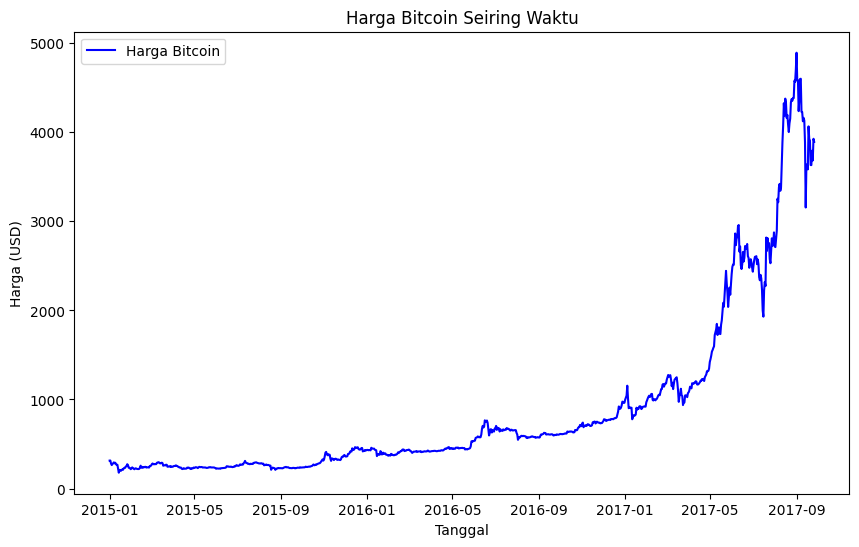

In [3]:
# Visualisasi data (chart harga Bitcoin)
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Harga Bitcoin', color='blue')
plt.title('Harga Bitcoin Seiring Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Harga (USD)')
plt.legend()
plt.show()
    

In [4]:
# Persiapan data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))
    

In [5]:
# Definisi ukuran jendela (window size)
window_size = 60

# Fungsi untuk membuat dataset
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:(i + window_size), 0])
        y.append(data[i + window_size, 0])
    return np.array(X), np.array(y)

# Membuat dataset
X, y = create_dataset(scaled_data, window_size)
    

In [6]:
# Mengubah bentuk data untuk LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    

In [7]:
# Membagi data menjadi set pelatihan dan pengujian
train_size = int(len(X) * 0.7)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]
    

In [ ]:
# Membangun model LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Kompilasi model
model.compile(optimizer='adam', loss='mean_squared_error')

# Melatih model
model.fit(X_train, y_train, epochs=100, batch_size=32)
    

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 104ms/step - loss: 0.0015
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - loss: 1.6172e-04
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - loss: 1.1069e-04
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - loss: 8.5220e-05
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 8.8835e-05
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - loss: 7.0897e-05
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - loss: 8.2298e-05
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - loss: 9.2634e-05
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - loss: 9.1341e-05
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - loss: 6.7952e-05
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - loss: 9.2649e-05
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - loss: 6.9860e-05
Epoch 13/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - loss: 7.3806e-05
Epoch 14/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - loss: 6

In [ ]:
# Evaluasi model
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(y_test.reshape(-1,1))

# Menghitung performa model
mae = mean_absolute_error(actual, predictions)
mse = mean_squared_error(actual, predictions)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
    

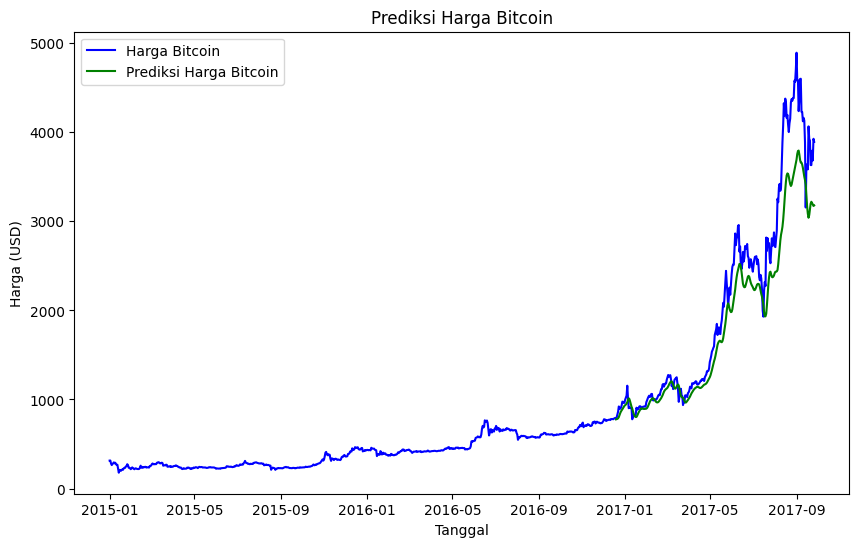

In [10]:
# Visualisasi prediksi (chart harga Bitcoin dan prediksinya)
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Harga Bitcoin', color='blue')
plt.plot(data.index[train_size+window_size:], predictions, color='green', label='Prediksi Harga Bitcoin')
plt.title('Prediksi Harga Bitcoin')
plt.xlabel('Tanggal')
plt.ylabel('Harga (USD)')
plt.legend()
plt.show()
    